# Mid Test Project - Group 11
### Dataset : Credit Card Fraud

Our Team:
1. Luh Putu Deswinta Dharmariani (2208541009)
2. Ni Kadek Yuni Antari (2208541018)
3. Ni Kadek Intan Dwi Pratiwi (2208541023)

In this notebook, we will discuss about the analysis of data on the credit card fraud dataset. The goal of this project is to investigate what variables can indicate fraud in credit card transactions. For this we can:

1. Get intuition about the data;
2. Document an exploratory data analysis;
3. Point out conclusions in every step of analysis;
4. Use graphical modules (matplotlib and seaborn) to answer questions;

## 1. Importing Libraries

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)
#NOTES : pd.set_option is used to define how many rows/columns maximum will be shown.

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2.  Reading and Exploring the Data

In [2]:
# Read the data
data_cc = pd.read_csv('fraud_cc.csv')
# We start by looking to the data features in first 5 rows.
data_cc.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


(INTERPRETATION) : By looking at the dataset, it's possible to see the meaning of each columns of the data. In this dataset, we have:
1. distance_from_home = distance from home to where the transaction occurred.
2. distance_from_last_transaction = distance to the last transaction that occurred.
3. ratio_to_median_purchase_price = the ratio of the transaction purchase price to the average purchase price.
4. repeat_retailer = Whether the transaction occurred from the same retailer?
5. used_chip = Whether the transaction used a chip in credit card?
6. used_pin_number = Whether the transaction occurred using a PIN number?
7. online_order = Whether the transaction was an online transaction? like shopee or tokopedia
8. fraud = Is the transaction a scam?

### 2.1 Overview from the Data

In [3]:
# Once read the data, let's now use a simple implementation to extract useful information about the dataset.
data_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


(INTERPRETATION)  : From the output above, we can see that the dataset has 1 million rows and 8 columns. There are no empty cells in the dataset, which only contains float-type values.

### 2.2 More details about the Data

In [4]:
# Shows statistical descriptive data to provide further information
data_cc.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


(INTERPRETATION)  : As can be observed, there is a 26 km average distance (in kilometers) between house and transaction locations. The data also shows that the closest distance from house   to the transaction locaton is 0.005 kilometers. The greatest distance is 10,000 kilometers, which makes it already questionable because it is 10 times farther than the distance between Bali and Jakarta. 

In [ ]:
# View existing columns in a dataset
data_kartu_kredit.columns

### 2.3  Graphical Exploration
In this session, we present useful charts that could be used to get intuition about the data. 

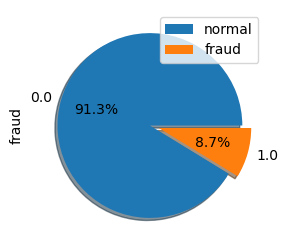

0.0    912597
1.0     87403
Name: fraud, dtype: int64


In [5]:
data_cc["fraud"].value_counts().plot(kind = 'pie',explode=[0.0, 0.1],figsize=(3,3),autopct='%1.1f%%',shadow=True)
plt.legend(["normal","fraud"])
plt.show()
# NOTES : %1.1f%% is used to shows the percentage in each label, we are using 'f' cause 'fraud' variable has float-type values. 

print(data_cc['fraud'].value_counts())

(INTERPRETATION)  : As we can see, in the 'fraud' column, 912597 records have a value of 0.0 or around 91.3%, are not fraud cases. Then, 87403 records have a value of 1.0 or around 8.7%, are fraud cases. It can be concluded that most transactions are not fraudulent. If we use this dataframe as the basis for our prediction and analysis model, we may get a lot of errors and our algorithm may become overfit as it will "assume" that most transactions are not fraudulent. For this reason, we need to normalize our dataframe.

In [6]:
# The next step is to look at the percentage of each variable's values which are contains boolean-type values. 
print('Percentage of fraud in repeat retailer:',
      100*data_cc.loc[(data_cc.fraud==1) & (data_cc.repeat_retailer==1)].shape[0]/data_cc.loc[data_cc.fraud==1].shape[0])
print('Percentage of fraud not using chip:',
      100*data_cc.loc[(data_cc.fraud==1) & (data_cc.used_chip==0)].shape[0]/data_cc.loc[data_cc.fraud==1].shape[0])
print('Percentage of fraud not using PIN:',
      100*data_cc.loc[(data_cc.fraud==1) & (data_cc.used_pin_number==0)].shape[0]/data_cc.loc[data_cc.fraud==1].shape[0])
print('Percentage of fraud in online orders:',
      100*data_cc.loc[(data_cc.fraud==1) & (data_cc.online_order==1)].shape[0]/data_cc.loc[data_cc.fraud==1].shape[0])

Percentage of fraud in repeat retailer: 88.0118531400524
Percentage of fraud not using chip: 74.36014782101302
Percentage of fraud not using PIN: 99.6876537418624
Percentage of fraud in online orders: 94.63176321178906


(INTERPRETATION)  : Several things can be drawn from the description above.
1. Fraud cases exist in transactions from the same store, at 88%.
2. Fraud exists in 74% of transactions that aren't using chips.
3. Most fraud cases, about 99%, involve transactions without a PIN. It means, transactions that occur with a PIN number will not experience fraud.
4. Most of the fraud, which is about 94%, is done through online orders

Therefore, online ordering transactions and transactions without a PIN have a significant impact on fraud cases. For more details, please see the graph below.

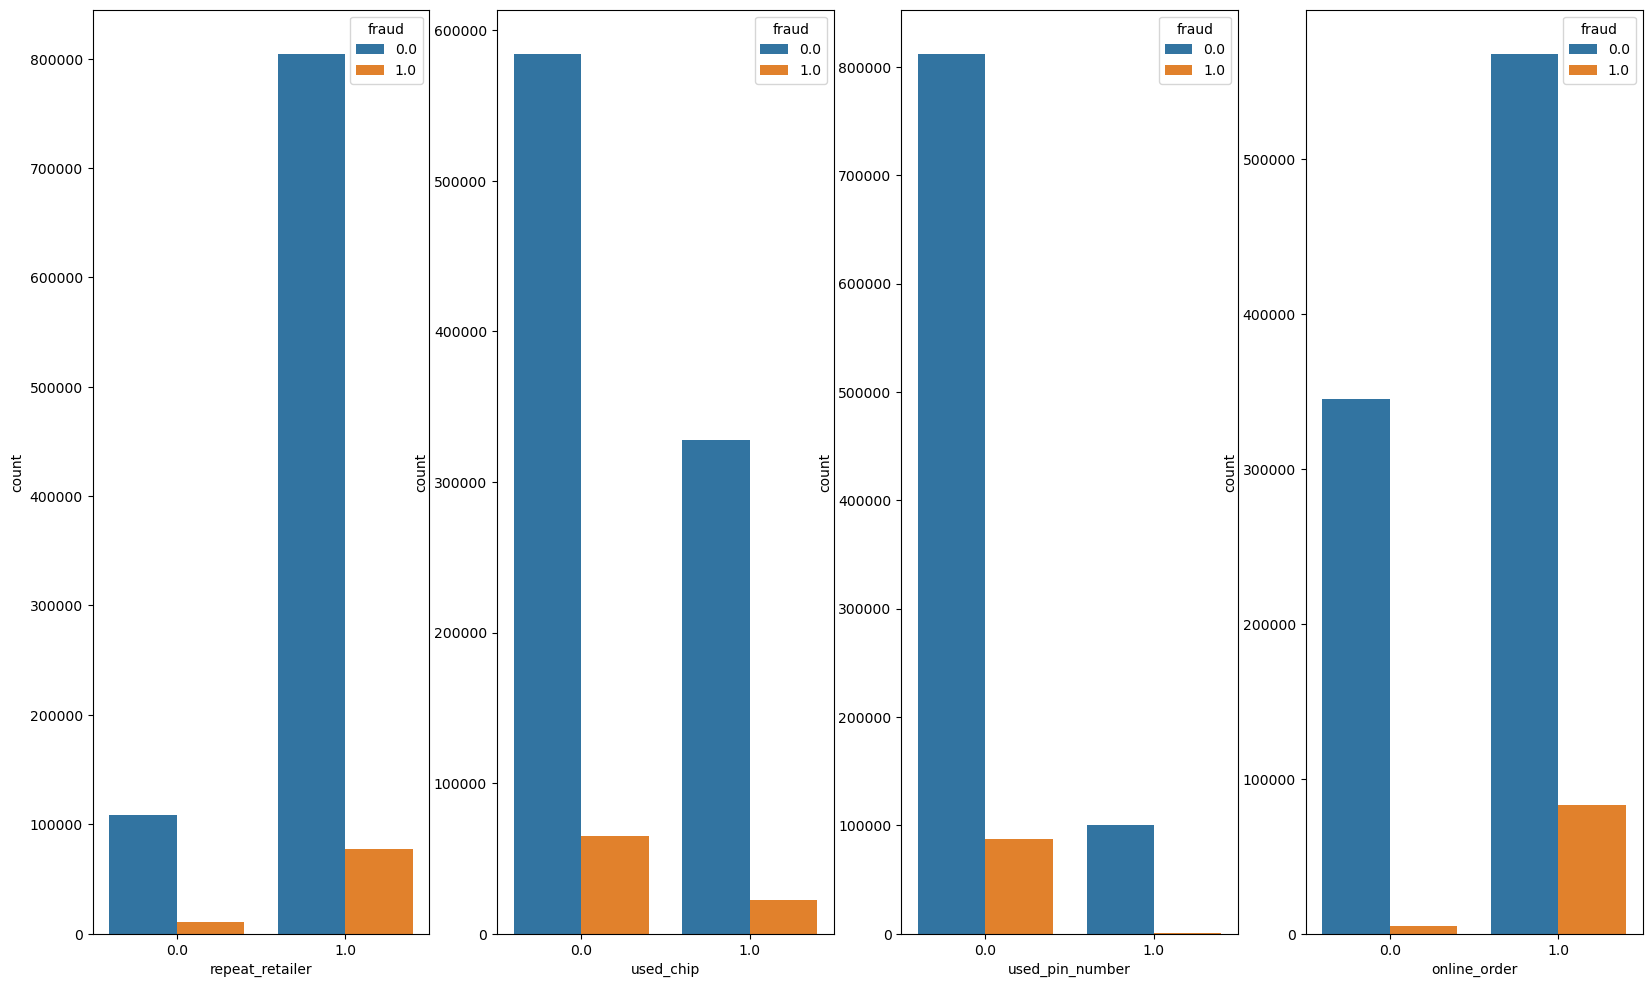

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,12))
s = sns.countplot(ax = ax1, x="repeat_retailer", data=data_cc, hue='fraud')
s = sns.countplot(ax = ax2, x="used_chip", data=data_cc, hue='fraud')
s = sns.countplot(ax = ax3, x="used_pin_number", data=data_cc, hue='fraud')
s = sns.countplot(ax = ax4, x="online_order", data=data_cc, hue='fraud')
plt.show();

## 3. Normalization and Data Pre-processing
Normalization is used to remove bias in the data, so that data with a large range will give an equivalent effect to data with a narrower range.

In [8]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(data_cc)
data_normalisasi = pd.DataFrame(d, columns=data_cc.columns)
data_normalisasi.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0


In [9]:
data_normalisasi.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.002504,0.000425,0.006795,0.881536,0.350399,0.100608,0.650552,0.087403
std,0.006150,0.002181,0.010454,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000364,0.000025,0.001760,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000937,0.000084,0.003709,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.002421,0.000283,0.007812,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Splitting The Data

In [10]:
# Split data into X dan y
X = data_normalisasi.drop(['fraud'], axis = 1)
y = data_normalisasi['fraud']

In [11]:
from sklearn.model_selection import train_test_split
# Train = 80% and Test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (800000, 7), y_train: (800000,)
TESTING: X_test: (200000, 7), y_test: (200000,)


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

## 5. Predictive Modeling
Finally, we come to the main point of our project: training a classification model to predict credit card fraud. 

### 5.1 Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')
model_lr.fit(X_train,y_train)

LogisticRegression(C=10, random_state=0)

In [15]:
y_test_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
scores_dict = {}
scores_dict['Logistic Regression'] = {'Train': f1_score(y_train,y_train_pred),
                                      'Test': f1_score(y_test, y_test_pred),}

Train Result:
Accuracy Score: 95.61%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.959280      0.901202  0.956122       0.930241       0.954198
recall          0.994114      0.559935  0.956122       0.777024       0.956122
f1-score        0.976386      0.690715  0.956122       0.833551       0.951390
support    729999.000000  70001.000000  0.956122  800000.000000  800000.000000
_______________________________________________
Confusion Matrix: 
 [[725702   4297]
 [ 30805  39196]]

Test Result:
Accuracy Score: 95.59%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.959193      0.898960   0.95595       0.929076       0.953952
recall          0.994042      0.556258   0.95595       0.775150       0.955950
f1-score        0.976306      0.687256   0.95595 

(INTERPRETATION)  : The results of the train and test data show that the accuracy of the train and the accuracy of the test have good scores and are balanced. It may be said that Logistic Regression is a useful and legit model.

#### KFold Regresi Logistik

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [17]:
score_lr = cross_val_score(model_lr, X, y, cv = k_fold, n_jobs = 1, scoring = 'accuracy')
print(score_lr)

[0.9563  0.95751 0.95598 0.95543 0.95634 0.95619 0.95685 0.95625 0.95614
 0.95708]


In [18]:
score_lr.mean()*100

95.6407

### 5.2 K-Nearest Neighbors (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)

# NOTES : n_neighbors=3 means that the KNN model will consider the 5 nearest neighbors when making predictions. 
#         The number of neighbors chosen can affect the performance of the model. If it is too small, the model may become 
#         susceptible to noise and outliers. On the other hand, if it is too large, the model may lose the ability to learn 
#         finer details in the data. 

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_test_pred = model_knn.predict(X_test)
y_train_pred = model_knn.predict(X_train)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
scores_dict['K-Nearest Neighbors (KNN)'] = {'Train': f1_score(y_train,y_train_pred),
                                            'Test': f1_score(y_test, y_test_pred),}

Train Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999667      0.998526  0.999568       0.999096       0.999567
recall          0.999859      0.996529  0.999568       0.998194       0.999568
f1-score        0.999763      0.997526  0.999568       0.998645       0.999567
support    729999.000000  70001.000000  0.999568  800000.000000  800000.000000
_______________________________________________
Confusion Matrix: 
 [[729896    103]
 [   243  69758]]

Test Result:
Accuracy Score: 99.91%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999370      0.996024   0.99908       0.997697       0.999079
recall          0.999622      0.993392   0.99908       0.996507       0.999080
f1-score        0.999496      0.994706   0.99908 

(INTERPRETATION)  : The results of the train and test data show that the accuracy of the train and the accuracy of the test have good scores and are balanced. It may be said that K-Nearest Neighbors (KNN) is a useful and legit model.

#### KFold KNN

In [ ]:
score_knn = cross_val_score(model_knn,X,y,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score_knn)

In [ ]:
score_knn.mean() * 100

### 5.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, oob_score=False)
model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {'Train': f1_score(y_train,y_train_pred),
                                'Test': f1_score(y_test, y_test_pred),}

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

Model yang digunakan yaitu menggunakan Regresi Logistik dan menggunakan KNN. Selain itu kami juga mencoba menggunakan Random Forest dan didapat tingkat akurasinya adalah 100%. Sehingga dapat dikatakan dengan menggunakan Random Forest hasil analisisnya memiliki tingkat akurasi yang lebih baik.